In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
from causal_ccm.causal_ccm import ccm

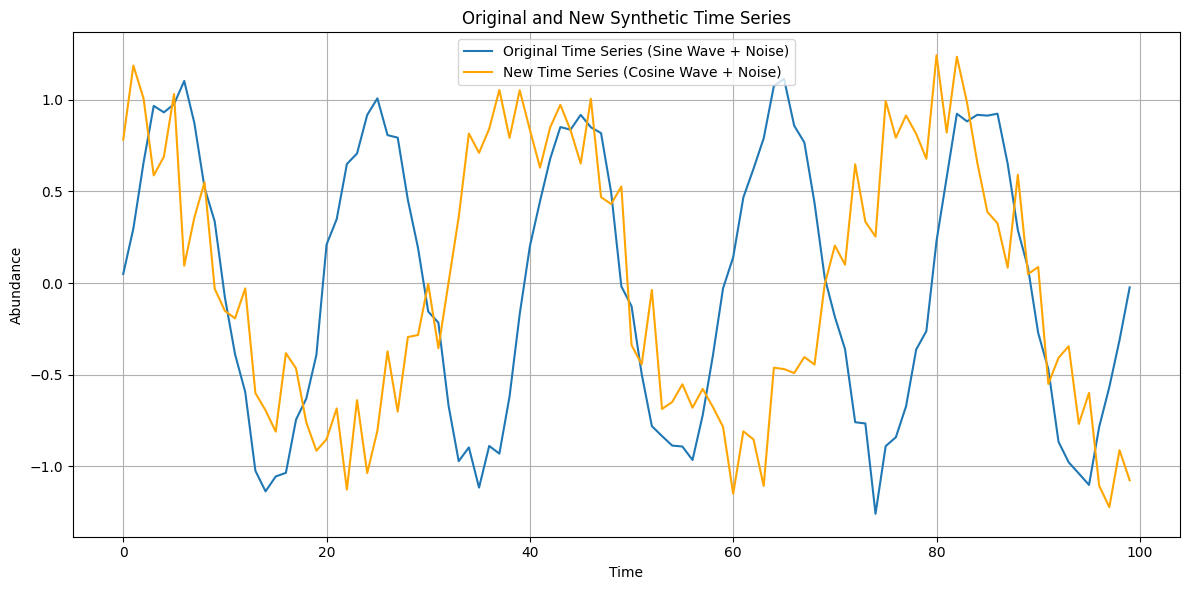

In [19]:
# Test data

L = 100  # Length of time series
E = 3    # Embedding dimension
tau = 2  # Time delay

# Generate synthetic time series data (e.g., a sine wave with some noise)
np.random.seed(42)
time_series = np.sin(np.linspace(0, 10 * np.pi, L)) + np.random.normal(0, 0.1, L)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'time': np.arange(L),
    'abundance': time_series
})

np.random.seed(123)
time_series_new = np.cos(np.linspace(0, 5 * np.pi, L)) + np.random.normal(0, 0.2, L)

data_new = pd.DataFrame({
    'time': np.arange(L),
    'abundance': time_series_new
})

plt.figure(figsize=(12, 6))

plt.plot(data['time'], data['abundance'], label='Original Time Series (Sine Wave + Noise)')
plt.plot(data_new['time'], data_new['abundance'], label='New Time Series (Cosine Wave + Noise)', color='orange')

plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('Original and New Synthetic Time Series')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [20]:
# shadow manifold functiom

'''
time_series -> Data measured over time (abundance data)
L           -> Length of time series that should be concidered
E           -> Embedding dimension
tau         -> time delay

'''

def shadow_manifold(time_series_Y, L, E, tau):

    # crop data at L
    crp_ts = time_series_Y[:L]

    shadow_M = {}

    for t in range((E - 1) * tau, L): # iterate through time

        lag = [] # lagged values

        for t2 in range(0, E): # get lags - add 1 to E-1 to include E

            lag.append(time_series_Y[t - t2 * tau]) # access lagged time points and store in list

        shadow_M[t] = lag # add list to dict
    
    return shadow_M




In [21]:
shadow_M = shadow_manifold(time_series, L, E, tau)

In [22]:
for a,b in shadow_M.items():

    print(a)
    print(b)

4
[0.9314869039717403, 0.6576767828647097, 0.04967141530112327]
5
[0.976460431978957, 0.9668789376911383, 0.29820701558136864]
6
[1.1029221002654075, 0.9314869039717403, 0.6576767828647097]
7
[0.8725053134461231, 0.976460431978957, 0.9668789376911383]
8
[0.5201124252692756, 1.1029221002654075, 0.9314869039717403]
9
[0.3359885612000261, 0.8725053134461231, 0.976460431978957]
10
[-0.07806970277931363, 0.5201124252692756, 1.1029221002654075]
11
[-0.38859311868269436, 0.3359885612000261, 0.8725053134461231]
12
[-0.5939627590640019, -0.07806970277931363, 0.5201124252692756]
13
[-1.023897879100551, -0.38859311868269436, 0.3359885612000261]
14
[-1.1363339418112453, -0.5939627590640019, -0.07806970277931363]
15
[-1.0550960921071053, -1.023897879100551, -0.38859311868269436]
16
[-1.035430972298549, -1.1363339418112453, -0.5939627590640019]
17
[-0.7447217310322297, -1.0550960921071053, -1.023897879100551]
18
[-0.6314432250077185, -1.035430972298549, -1.1363339418112453]
19
[-0.3923783573146086, 

In [23]:
# create matrix with distances between all vectors

def vec_dist_matrx (shadow_M):
    
    # seperate time steps and vectors to create arrays for cdist
    vector = []
    steps = []
    vecs = []

    for a, b in shadow_M.items():

        vector.append((a, b))

    for i in vector:
        
        steps.append(i[0])
        vecs.append(i[1])

    steps = np.array(steps)
    vecs = np.array(vecs)

    distance_metrics = distance.cdist(vecs, vecs, metric= "euclidean")

    return distance_metrics, steps



In [24]:
vec_dist_matrx(shadow_M)

(array([[0.        , 0.39924746, 0.68850021, ..., 2.52870267, 2.19355283,
         1.93284741],
        [0.39924746, 0.        , 0.38270571, ..., 2.87870504, 2.55268529,
         2.30445376],
        [0.68850021, 0.38270571, 0.        , ..., 3.09752981, 2.79747318,
         2.57049434],
        ...,
        [2.52870267, 2.87870504, 3.09752981, ..., 0.        , 0.41105616,
         0.77208132],
        [2.19355283, 2.55268529, 2.79747318, ..., 0.41105616, 0.        ,
         0.3666605 ],
        [1.93284741, 2.30445376, 2.57049434, ..., 0.77208132, 0.3666605 ,
         0.        ]]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
        89, 90, 91, 92, 93, 9

In [25]:
# function for dist metrics from time line

def get_dist_metr(time_series_Y, L, E, tau):

    shadow = shadow_manifold(time_series_Y, L, E, tau)
    distance_matrix = vec_dist_matrx(shadow)

    return distance_matrix

print("Time series 1")
print(get_dist_metr(time_series, L, E, tau))

print("Time series 2")
print(get_dist_metr(time_series_new, L, E, tau))

Time series 1
(array([[0.        , 0.39924746, 0.68850021, ..., 2.52870267, 2.19355283,
        1.93284741],
       [0.39924746, 0.        , 0.38270571, ..., 2.87870504, 2.55268529,
        2.30445376],
       [0.68850021, 0.38270571, 0.        , ..., 3.09752981, 2.79747318,
        2.57049434],
       ...,
       [2.52870267, 2.87870504, 3.09752981, ..., 0.        , 0.41105616,
        0.77208132],
       [2.19355283, 2.55268529, 2.79747318, ..., 0.41105616, 0.        ,
        0.3666605 ],
       [1.93284741, 2.30445376, 2.57049434, ..., 0.77208132, 0.3666605 ,
        0.        ]]), array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 9

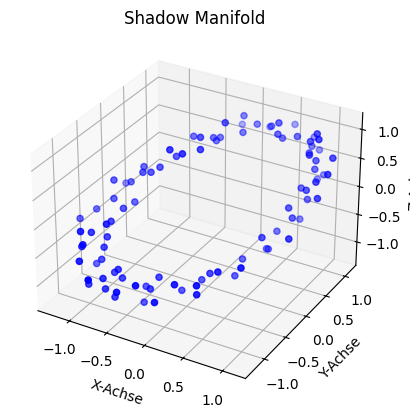

In [26]:
def show_manifolds(time_series, L, E, tau):

    shadow_M = shadow_manifold(time_series, L, E, tau)

    x = []
    y = []
    z = []

    for key in shadow_M:

        x.append(shadow_M[key][0])
        y.append(shadow_M[key][1])
        z.append(shadow_M[key][2])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c='b', marker='o')

    ax.set_xlabel('X-Achse')
    ax.set_ylabel('Y-Achse')
    ax.set_zlabel('Z-Achse')

    plt.title('Shadow Manifold')

    plt.show()

show_manifolds(time_series, L, E, tau)





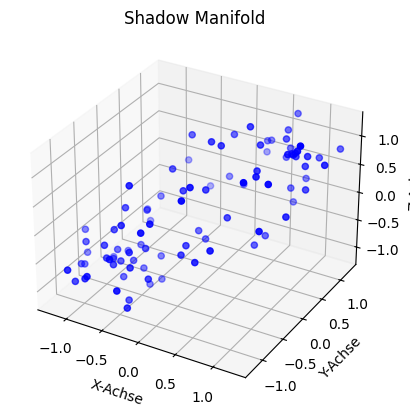

In [27]:
show_manifolds(time_series_new, L, E, tau)

In [28]:
dist_matrix, steps =  get_dist_metr(time_series, L, E, tau)

print(dist_matrix)

print(steps)

[[0.         0.39924746 0.68850021 ... 2.52870267 2.19355283 1.93284741]
 [0.39924746 0.         0.38270571 ... 2.87870504 2.55268529 2.30445376]
 [0.68850021 0.38270571 0.         ... 3.09752981 2.79747318 2.57049434]
 ...
 [2.52870267 2.87870504 3.09752981 ... 0.         0.41105616 0.77208132]
 [2.19355283 2.55268529 2.79747318 ... 0.41105616 0.         0.3666605 ]
 [1.93284741 2.30445376 2.57049434 ... 0.77208132 0.3666605  0.        ]]
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [29]:
# get nearest distances and timesteps

def nearest_dist_and_step(timepoint_oi, steps, dist_matr):

    index_timepoint = np.where(steps == timepoint_oi) # get index of timepoint

    dist_timepoint = dist_matr[index_timepoint].squeeze() # distances from vector at time t (this is one row)

    # get top closest vectors
    nearest_indis = np.argsort(dist_timepoint)[1:E + 2] # sort indeces, exlude 0 (distance to itself) -> E+1+1
    
    nearest_timesteps = steps[nearest_indis]
    nearest_distances = dist_timepoint[nearest_indis]

    return nearest_timesteps, nearest_distances

nearest_dist_and_step(99, steps, dist_matrix)


(array([20, 59, 60, 40]),
 array([0.25101556, 0.26024866, 0.27306611, 0.31307526]))

In [30]:
def prediction(t):
        
    non_zero = 0.000001 # non zero value to avoid pproblems with dividingby zero

    index_timepoint = np.where(steps == t) # get the index of time t

    dist_timepoint = dist_matrix[index_timepoint].squeeze()

    nearest_timesteps, nearest_distances = nearest_dist_and_step(t, steps, dist_matrix)

    # get weights
    u = np.exp(-nearest_distances / np.max([non_zero, nearest_distances[0]])) # di​ wird exponentiell skaliert um Gewichtungen zu berechnen. Kleinere Distanzen führen zu größeren Gewichtungen
    w = u / np.sum(u) # divide by sum to average in total to 1 

    # get prediction of X
    X_true = time_series[t] # get corresponding true X
    X_cor = np.array(time_series)[nearest_timesteps] # get corresponding Y to cluster in Mx
    X_hat = (w * X_cor).sum() # get X_hat

    return X_true, X_hat

In [31]:
prediction(80)

(0.22918079839732614, 0.264226305848541)

In [32]:

# import data
datapath_for_ccm = 'C:/Users/klbal/Desktop/Internship #2/pivoted_output_2.txt'

ccm_data = pd.read_csv(datapath_for_ccm, delimiter='\t')

# define species to compare

Y_baki = 'Chlamy26'

X_baki = 'Chlamy88'

X_series = ccm_data[X_baki]

Y_series = ccm_data[Y_baki]

X->Y r 0.85 p value 0.0
Y->X r 0.91 p value 0.0


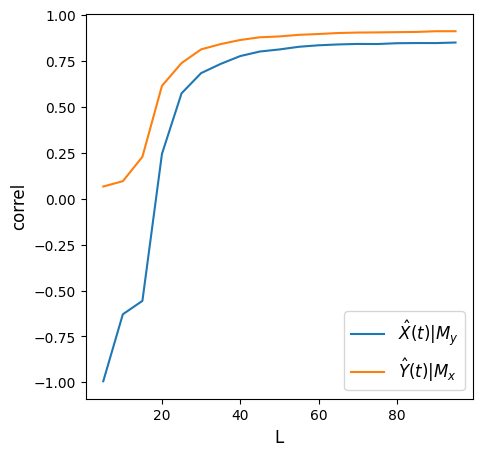

In [33]:
# checking convergence

# Parameters für den ursprünglichen Datensatz
L = 100  # Length of time series
E = 3    # Embedding dimension
tau = 2  # Time delay

L_range = range(5, L, 5) # L values to test
tau = 1
E = 2

Xhat_My, Yhat_Mx = [], [] # correlation list

for L in L_range: 

    ccm_XY = ccm(X_series, Y_series, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y_series, X_series, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
    
print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))    
    
# plot convergence. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=12)
plt.ylabel('correl', size=12)
plt.legend(prop={'size': 12})  

In [34]:
test = ccm(X_series, Y_series, tau, E, L)

print(test.causality()[0])

0.8500319960235484


X->Y r 0.85 p value 0.0
Y->X r 0.91 p value 0.0


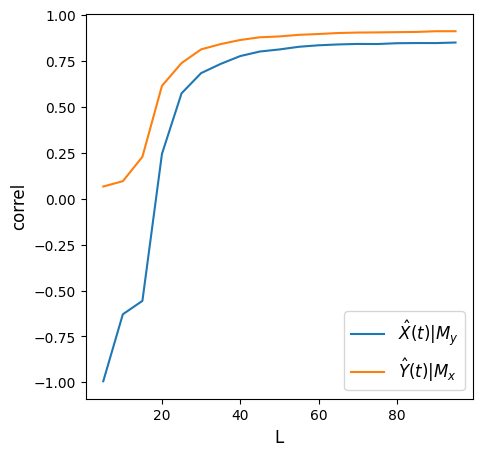

In [35]:
# checking convergence

# Parameters für den ursprünglichen Datensatz
L = 100  # Length of time series
E = 3    # Embedding dimension
tau = 2  # Time delay

L_range = range(5, L, 5) # L values to test
tau = 1
E = 2

Xhat_My, Yhat_Mx = [], [] # correlation list

for L in L_range: 

    ccm_XY = ccm(X_series, Y_series, tau, E, L) # define new ccm object # Testing for X -> Y
    ccm_YX = ccm(Y_series, X_series, tau, E, L) # define new ccm object # Testing for Y -> X    
    Xhat_My.append(ccm_XY.causality()[0]) 
    Yhat_Mx.append(ccm_YX.causality()[0]) 
    
    
print('X->Y r', np.round(Xhat_My[-1], 2), 'p value', np.round(ccm_XY.causality()[1], 4))
print('Y->X r', np.round(Yhat_Mx[-1], 2), 'p value', np.round(ccm_YX.causality()[1], 4))    
    
# plot convergence. Convergence is necessary to conclude causality
plt.figure(figsize=(5,5))
plt.plot(L_range, Xhat_My, label='$\hat{X}(t)|M_y$')
plt.plot(L_range, Yhat_Mx, label='$\hat{Y}(t)|M_x$')
plt.xlabel('L', size=12)
plt.ylabel('correl', size=12)
plt.legend(prop={'size': 12})  